In [1]:
# importing pandas
import pandas as pd

# charging database and printing that
file = "database.xlsx"
df = pd.read_excel(file)
df

,date,city,pib_pc,gdp_pc
0,1959,Itapiranga,3004.926941,3.004927
1,1970,Itapiranga,5284.236908,5.284237
2,1975,Itapiranga,11155.312684,11.155313
3,1980,Itapiranga,10969.719204,10.969719
4,1985,Itapiranga,4931.165401,4.931165
5,1996,Itapiranga,8853.991475,8.853991
6,1999,Itapiranga,17155.661309,17.155661
7,2000,Itapiranga,21664.837598,21.664838
8,2001,Itapiranga,28816.517242,28.816517
9,2002,Itapiranga,26076.918092,26.076918


In [2]:
# check unique values in the “city” column to confirm the cities
unique_cities = df["city"].unique()
unique_cities

array(['Itapiranga', 'São Carlos'], dtype=object)

In [3]:
# create variables for Diff-in-Diff
df["treatment"] = (df["city"] == "Itapiranga").astype(int)
df["post"] = (df["date"] >= 2001).astype(int)
df["did"] = df["treatment"] * df["post"]

# confirm the changes
df[["date", "city", "treatment", "post", "did"]].head(10)

,date,city,treatment,post,did
0,1959,Itapiranga,1,0,0
1,1970,Itapiranga,1,0,0
2,1975,Itapiranga,1,0,0
3,1980,Itapiranga,1,0,0
4,1985,Itapiranga,1,0,0
5,1996,Itapiranga,1,0,0
6,1999,Itapiranga,1,0,0
7,2000,Itapiranga,1,0,0
8,2001,Itapiranga,1,1,1
9,2002,Itapiranga,1,1,1


In [4]:
# importing smf
import statsmodels.formula.api as smf

# run Difference-in-Differences regression
model = smf.ols("gdp_pc ~ treatment + post + did", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gdp_pc   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           9.18e-22
Time:                        16:46:58   Log-Likelihood:                -166.05
No. Observations:                  56   AIC:                             340.1
Df Residuals:                      52   BIC:                             348.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4230      1.722      4.891      0.0

In [5]:
# separating df by city
df_itapiranga = df[df['city'] == 'Itapiranga']
df_sao_carlos = df[df['city'] == 'São Carlos']

c:\Users\aniel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\aniel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\aniel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


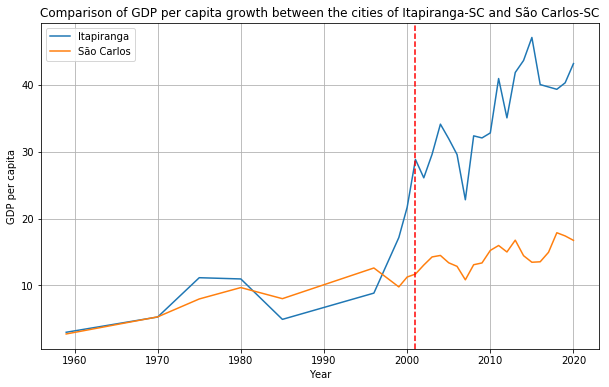

In [7]:
# VISUALIZATION
import matplotlib.pyplot as plt

# creating line chart
plt.figure(figsize=(10, 6)) 
plt.plot(df_itapiranga['date'], df_itapiranga['gdp_pc'], label='Itapiranga')
plt.plot(df_sao_carlos['date'], df_sao_carlos['gdp_pc'], label='São Carlos')

# adds a vertical line on the specified date
plt.axvline(x=2001, color='red', linestyle='--')

# customise the chart
plt.title('Comparison of GDP per capita growth between the cities of Itapiranga-SC and São Carlos-SC')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)
plt.show()